<a href="https://colab.research.google.com/github/hatie22/PortifolioProjects/blob/main/Bank_marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##  **Data-Driven Insights into Bank Marketing Campaign Effectiveness**



This project presents an in-depth analysis of a marketing campaign by a financial institution, aiming to understand customer behavior and identify strategies to improve future campaign performance. The dataset contains demographic, behavioral, and contact information of over 11,000 clients who were approached for subscription to a term deposit.

The objective of this analysis is to uncover key patterns, segment performance, and campaign characteristics that influence a customer’s decision to subscribe. By leveraging data visualization and exploratory insights, the project evaluates factors such as age, job type, education level, contact method, call duration, and previous campaign outcomes.

In [1]:
# import the libraries
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
df = pd.read_excel("/content/Cleaned_Bank_Marketing_Data.xlsx")

In [11]:
# Display basic information and the first few rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
 17  age_group  11162 non-null  object
dtypes: int64(7), object(11)
memory usage: 1.5+ MB


In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,55-64
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,55-64
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,35-44
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,45-54
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,45-54


In [13]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2,6
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no,25-34
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873,3921
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN,NaN


In [14]:
# 1. Distribution of target variable (deposit)
deposit_counts = df['deposit'].value_counts()

In [15]:
deposit_counts


,count
deposit,
no,5873
yes,5289


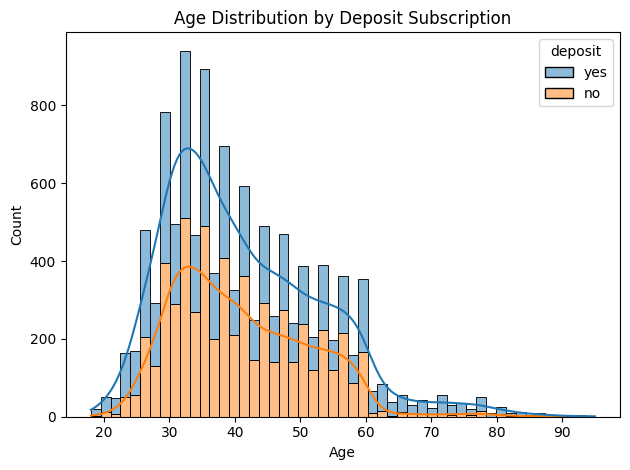

In [5]:
# 2. Age distribution by deposit status
df['age'] = pd.to_numeric(df['age'])
age_deposit_plot = sns.histplot(data=df, x='age', hue='deposit', kde=True, multiple='stack')
plt.title('Age Distribution by Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Summary: Age Distribution by Deposit Subscription**
The histogram visualizes how client age relates to their likelihood of subscribing to a term deposit. Key observations include:

1. Middle-aged clients (30–60 years) represent the majority of the dataset and were the most targeted group during the campaign.

2. Older clients (above 60 years) showed a noticeably higher subscription rate compared to younger age groups, as reflected by the denser "yes" responses in this age range.

3. Younger clients (below 30) had fewer overall subscriptions and made up a smaller portion of the contacted population.

Implication: Age is a significant factor in deposit subscription behavior. Future campaigns may benefit from targeting older age groups more actively, as they demonstrate a greater tendency to subscribe, possibly due to higher financial security or interest in savings products.

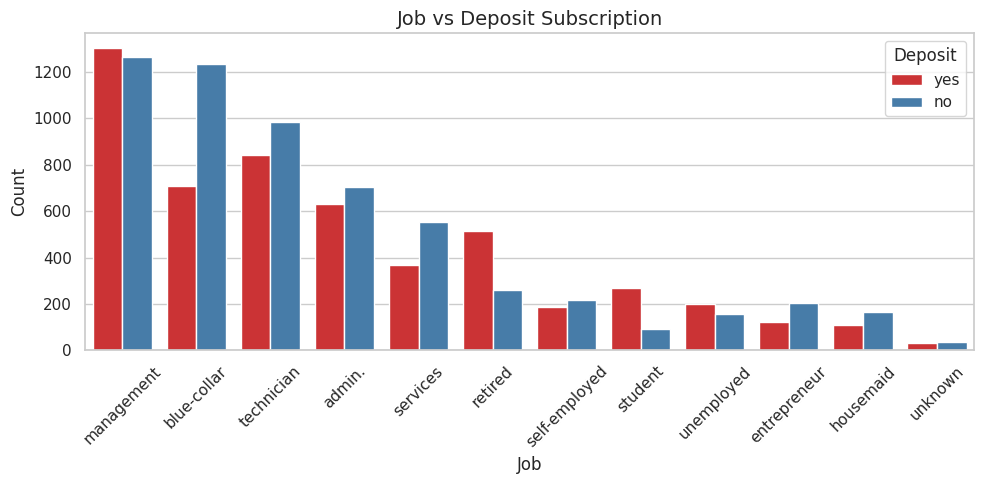

In [28]:
# 3. Job vs deposit
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="job", hue="deposit",
              order=df["job"].value_counts().index,
              palette="Set1")

plt.title("Job vs Deposit Subscription", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Job")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.tight_layout()
plt.show()

**Insights**

1. Higher Likelihood of Subscription

Students and Retired clients show the highest proportion of “yes” for deposits.

Likely because students may be starting financial planning early, and retired clients are looking for safer investment options.

2. Moderate Subscription Rates

Management, technicians, and admin. roles also have decent subscription rates.

These groups typically have more financial stability, making them open to term deposits.

3. Lower Subscription Rates

Blue-collar and services jobs lean heavily toward “no” for deposits.

Possibly due to lower disposable income or a preference for more liquid financial products.

4. Small Groups with Interesting Behavior

Unemployed clients still show some deposit subscriptions — maybe due to severance, savings, or retirement payouts.

Unknown categories are small but less reliable for insights (data quality issue).

3. Admin. and technician roles fall in the middle range with moderate subscription rates.

**Implication:** Job type is a strong predictor of campaign success. Future strategies should:

Focus more on high-conversion groups like students, retirees, and unemployed.

Reassess messaging, timing, or offer structure for lower-performing job segments to improve engagement.



**MY take on this Insight:**

Focus future campaigns on students, retired, and professional roles (management, admin, technicians) since they show higher positive responses.

Rethink strategies for blue-collar and services groups — maybe tailor campaigns differently (e.g., emphasizing flexibility or smaller deposit amounts).

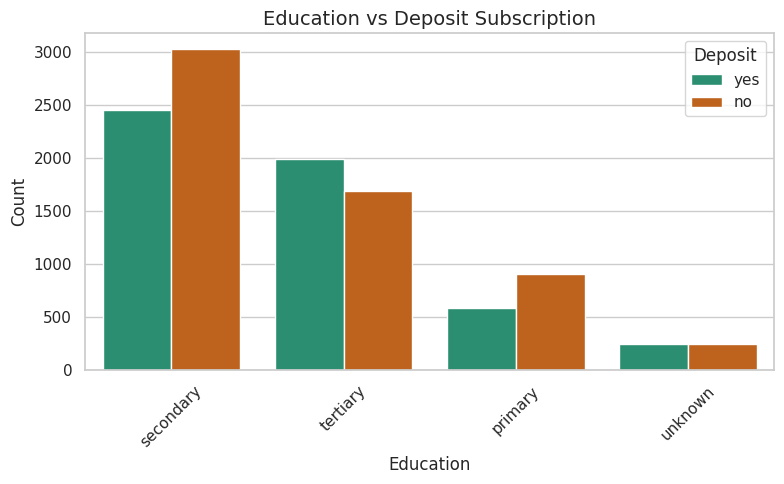

In [33]:
# 4. Education vs deposit
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="education", hue="deposit",
              order=df["education"].value_counts().index,
              palette="Dark2")

plt.title("Education vs Deposit Subscription", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.tight_layout()
plt.show()

**Summary: Deposit Subscription Rate by Education Level**
This stacked bar chart illustrates the relationship between clients' education levels and their likelihood of subscribing to a term deposit:

1. Clients with tertiary education have the highest subscription rate, suggesting they may be more financially informed or inclined to save.

2. Those with secondary education show moderate subscription rates, making them a potential target with the right messaging.

3. Primary and unknown education levels show the lowest subscription rates, which may reflect either limited financial resources or lesser understanding of the product.

**Implication:** Education level plays a meaningful role in influencing deposit subscription decisions. Future campaigns can benefit from:

Targeted financial literacy messaging for lower education groups.

More direct offers or advanced savings products tailored to tertiary-educated clients.


**For a Good Strategy**

1. Campaigns targeted at tertiary-educated clients are more effective and should be prioritized.

2. Since the secondary group is the largest, tailoring messaging to improve their conversion rate (e.g., through financial education or emphasizing deposit safety) could yield the biggest absolute gains.

3. Primary-educated groups may require different strategies (simplified messaging, smaller deposit offers).

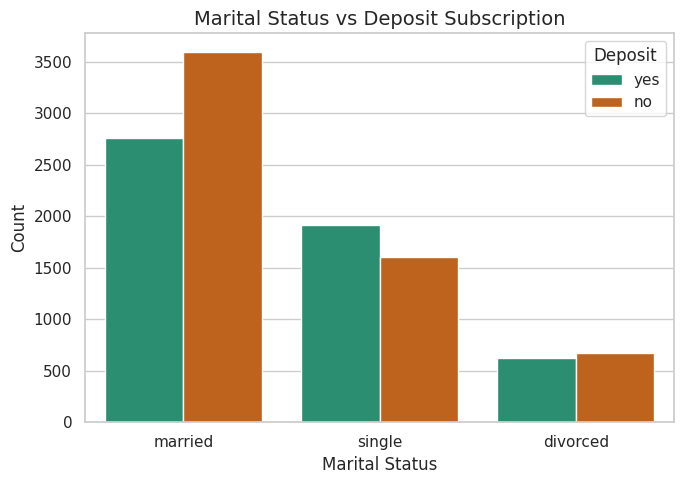

In [32]:
# Marital status vs deposit
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="marital", hue="deposit",
              order=df["marital"].value_counts().index,
              palette="Dark2")

plt.title("Marital Status vs Deposit Subscription", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.tight_layout()
plt.show()


1. Higher Likelihood of Subscription

Single clients have a slightly higher proportion of “yes” compared to married and divorced.

Singles may be younger, with fewer financial commitments (e.g., dependents, mortgages), making them more open to saving/investment products.

2. Moderate Likelihood

Married clients form the largest group overall.

While their proportion of “yes” is lower than singles, their sheer size means they still account for many deposit subscriptions.

Married individuals may have competing financial responsibilities (e.g., family expenses, housing loans) that reduce their deposit uptake.

3. Lower Likelihood

Divorced clients show the lowest proportion of “yes.”

This group may be more financially constrained or cautious about long-term commitments.

**For Good Strategy**

Marketing strategies should be tailored by marital status:

a) Singles: emphasize wealth-building and early financial independence.

b) Married: stress security and family benefits of deposits.

c) Divorced: highlight stability, flexible terms, or low-risk investment appeal.

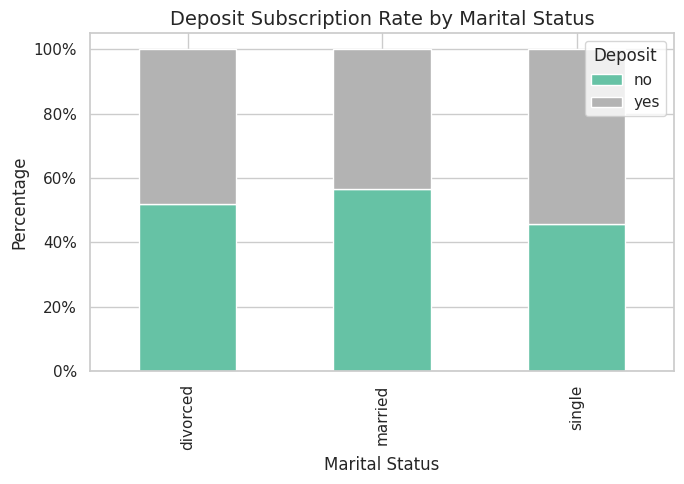

In [34]:
# Percentage-based stacked bar chart for Marital vs Deposit
marital_deposit = pd.crosstab(df['marital'], df['deposit'], normalize='index') * 100

marital_deposit.plot(kind='bar', stacked=True, colormap='Set2', figsize=(7,5))

plt.title("Deposit Subscription Rate by Marital Status", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Marital Status")
plt.legend(title="Deposit")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))  # Show percentages
plt.tight_layout()
plt.show()

**Insights from the percentage view:**

1. Single clients: have the highest subscription rate (largest proportion of “yes”).

2. Married clients: have the lowest subscription rate, but they still contribute many deposits overall because they are the largest group in number.

3. Divorced clients: sit in the middle, with a moderate subscription rate.

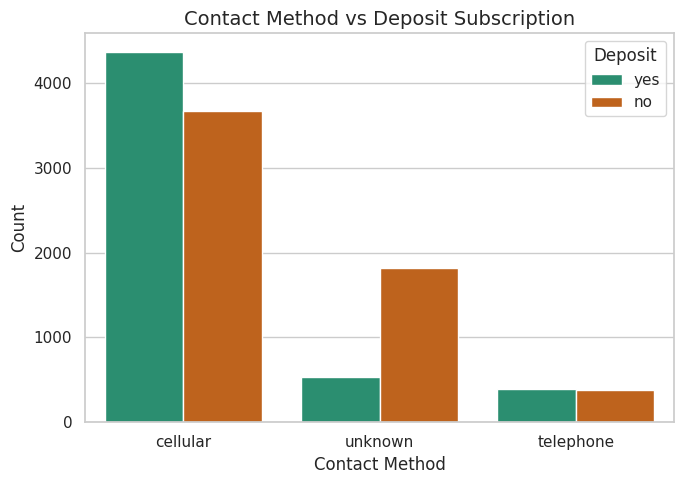

In [37]:
# contact method vs deposit
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="contact", hue="deposit",
              order=df["contact"].value_counts().index,
              palette="Dark2")

plt.title("Contact Method vs Deposit Subscription", fontsize=14)
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.legend(title="Deposit")
plt.tight_layout()
plt.show()

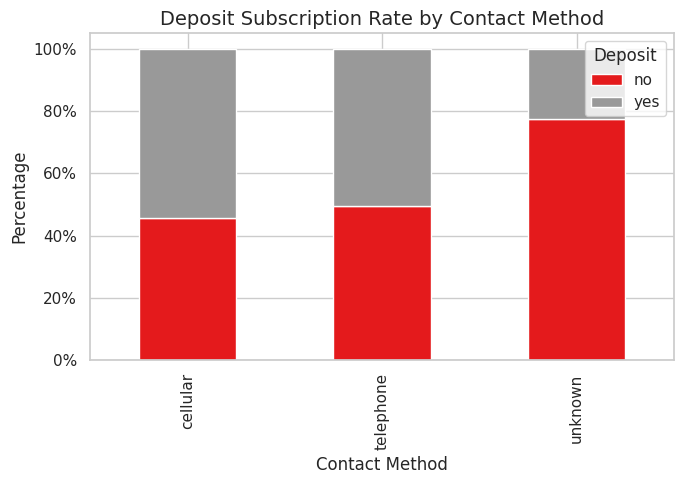

In [44]:
# Percentage-based stacked bar chart for Contact vs Deposit
contact_deposit = pd.crosstab(df['contact'], df['deposit'], normalize='index') * 100

contact_deposit.plot(kind='bar', stacked=True, colormap='Set1', figsize=(7,5))

plt.title("Deposit Subscription Rate by Contact Method", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Contact Method")
plt.legend(title="Deposit")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))  # Show percentages
plt.tight_layout()
plt.show()

**Insights:**

Cellular contact: Strongly outperforms other methods, with the highest subscription rate.

Telephone: Shows a much lower subscription rate.

Unknown: Almost no positive subscriptions, making it the least effective.

**For Good Strategy**

1. The bank should focus on cellular calls for future campaigns since they are clearly more effective.

2. Telephone could still be used for follow-ups, but success rates are much lower.

3. Unknown contacts provide little to no value and could be deprioritized.

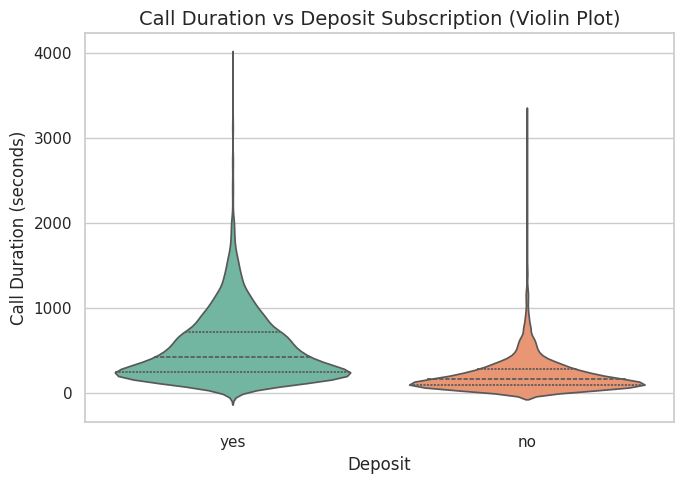

In [50]:
# Call Duration vs Deposit
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="deposit", y="duration", hue="deposit", palette="Set2", inner="quartile", legend=False)
plt.title("Call Duration vs Deposit Subscription (Violin Plot)", fontsize=14)
plt.xlabel("Deposit")
plt.ylabel("Call Duration (seconds)")
plt.tight_layout()
plt.show()

1. **Strong Relationship with Subscription**

- Clients who subscribed (“yes”) generally had much longer call durations.

- The median duration for “yes” is clearly higher than for “no.”

- This suggests that longer conversations increase the likelihood of subscription.




2. **Skewed Distribution**

- Most non-subscribers (“no”) had short call durations, clustered near the lower range.

- The distribution for “yes” has a long tail.Some calls went very long (outliers), but these outliers are exactly where many conversions happened.


3. **Campaign Implication**

- Short calls usually do not lead to deposits.

- Successful calls are typically longer, allowing agents to explain the product, address questions, and build trust.

- However, very long calls may not always be efficient: the bank should find an optimal call length threshold that balances efficiency and success rate.

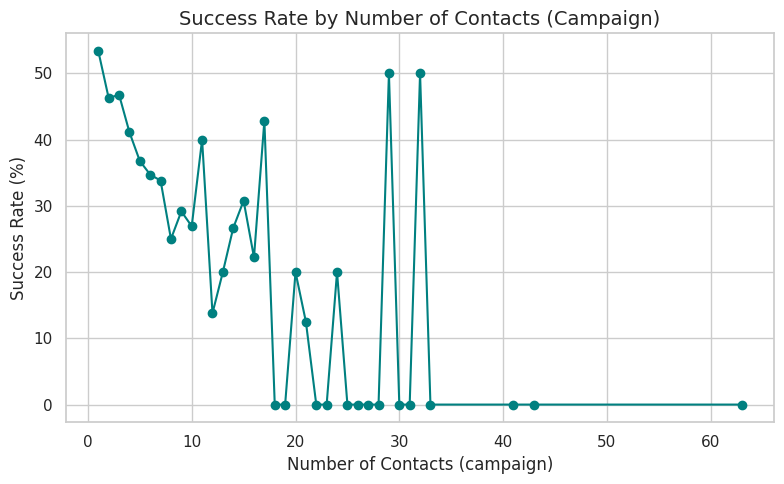

In [51]:
# Success Rate by Campaign Count (number of contacts)

# Average subscription rate grouped by number of contacts (campaign count)
campaign_success = df.groupby("campaign")["deposit"].apply(lambda x: (x=="yes").mean()*100)

plt.figure(figsize=(8,5))
campaign_success.plot(marker="o", color="teal")
plt.title("Success Rate by Number of Contacts (Campaign)", fontsize=14)
plt.xlabel("Number of Contacts (campaign)")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

**High success on the first contact**

- Clients who subscribe usually do so on the first or second call.

- This suggests that genuinely interested clients make decisions quickly once informed.

**Declining success with more contacts**

- As the campaign count increases, the success rate steadily declines.

- This means repeated calls may feel intrusive or target uninterested clients, lowering efficiency.

**Diminishing returns after 3–4 contacts**

- Beyond 3–4 attempts, the marginal gain is very small.

- Most clients who didn’t subscribe after a few calls rarely change their minds in later calls.

**Outliers in very high counts**

- Some clients may have very high campaign counts (10+ contacts).

- These cases often show very low success (near zero) and can waste resources.

# **Correlatiion Analysis**

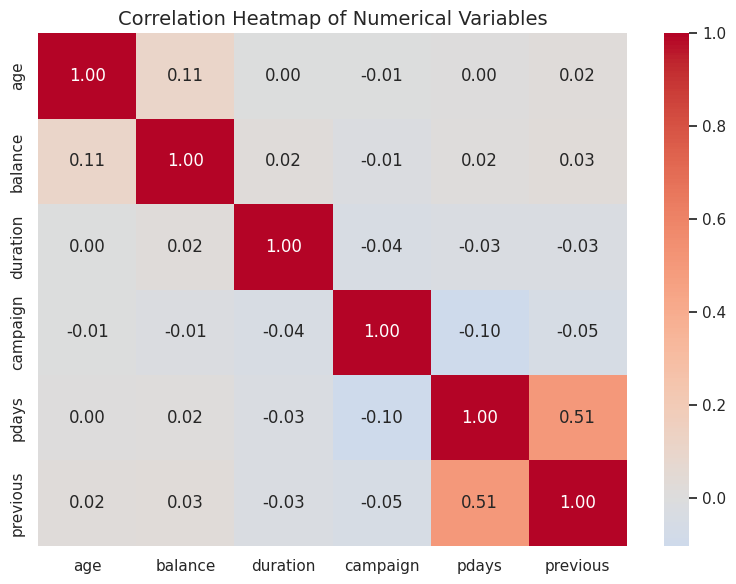

In [52]:
# Select numerical columns
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.tight_layout()
plt.show()

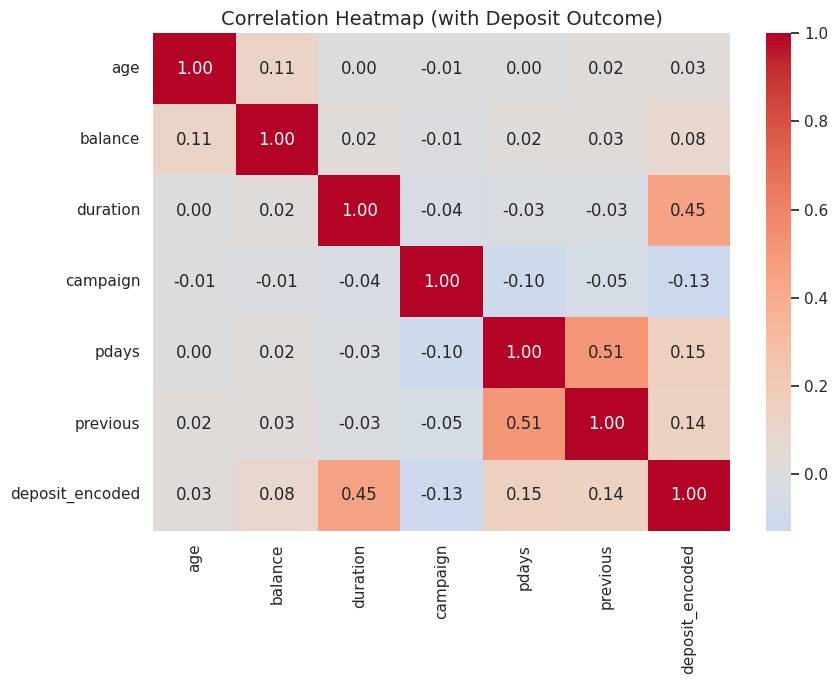

In [55]:
# Encode deposit: yes=1, no=0
df["deposit_encoded"] = df["deposit"].map({"yes": 1, "no": 0})

# Select numerical columns + encoded deposit
num_cols = ["age", "balance", "duration", "campaign", "pdays", "previous", "deposit_encoded"]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (with Deposit Outcome)", fontsize=14)
plt.tight_layout()
plt.show()

Correlation of Numerical Features with Deposit:
deposit_encoded    1.000000
duration           0.451919
pdays              0.151593
previous           0.139867
balance            0.081129
age                0.034901
campaign          -0.128081
dtype: float64


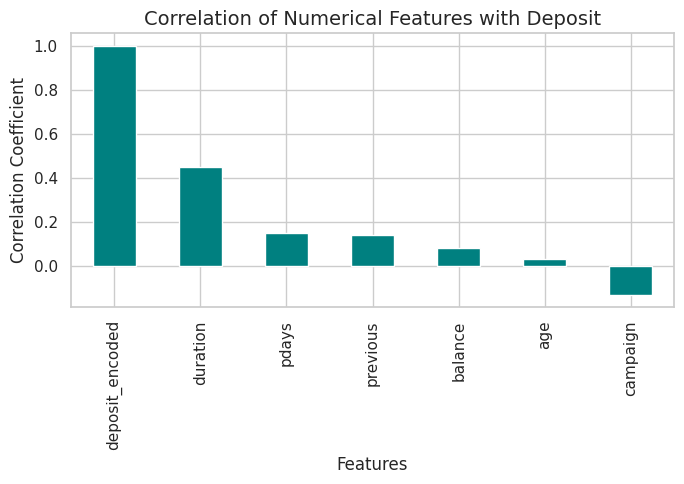

In [54]:
# Compute correlations with deposit
corr_with_deposit = df[num_cols].corrwith(df["deposit_encoded"]).sort_values(ascending=False)

# Display correlations
print("Correlation of Numerical Features with Deposit:")
print(corr_with_deposit)

# Plot as bar chart
plt.figure(figsize=(7,5))
corr_with_deposit.plot(kind="bar", color="teal")
plt.title("Correlation of Numerical Features with Deposit", fontsize=14)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# **Key Findings**

**Call Duration is the Strongest Driver**

- Longer calls are strongly associated with higher subscription rates.

- Most successful conversions happen when the conversation lasts long enough for the client to understand the product and have their questions answered.

**Follow-Up Timing Matters (Pdays & Previous)**

- Clients contacted recently in previous campaigns (low pdays) are more likely to subscribe.

- Clients who were engaged in prior campaigns (previous > 0) show a slightly higher chance of saying “yes.”

**Repeated Calls in the Same Campaign Reduce Success (Campaign)**

- Conversion rates decline as the number of contacts (campaign) increases.

- After 3–4 attempts, the probability of subscription falls sharply, suggesting over-contacting is counterproductive.

**Demographics Have Limited Predictive Power**

- Age shows only a weak correlation — older or younger clients alone aren’t reliable predictors of subscription.

- Balance has little impact on decision-making — wealthier clients do not necessarily subscribe more often.

# **Recommendations**

**Prioritize First Contact Quality**

- Invest in training agents to deliver persuasive, client-centered conversations in the first call.

- Emphasize building rapport, addressing concerns, and clearly communicating benefits early.

- Optimize Call Duration

- Set benchmarks for minimum call engagement time, as short calls rarely lead to conversions.

- Encourage strategies that keep clients engaged without prolonging the conversation unnecessarily.

**Strategic Follow-Ups**

- Re-contact clients at optimal intervals (based on pdays) rather than random or excessive follow-ups.

- Focus on clients with prior engagement (previous > 0) as they demonstrate higher receptivity.

**Limit Campaign Attempts**

- Cap the number of calls per campaign to 3–4 maximum.

- Beyond this threshold, allocate resources to new leads rather than pursuing resistant clients.

**Segmentation Beyond Demographics**

- Instead of focusing only on age or wealth, leverage behavioral indicators (like past engagement and call responsiveness) to identify high-potential clients.

- Combine demographic insights (e.g., education level, job type) with behavioral patterns for smarter targeting.

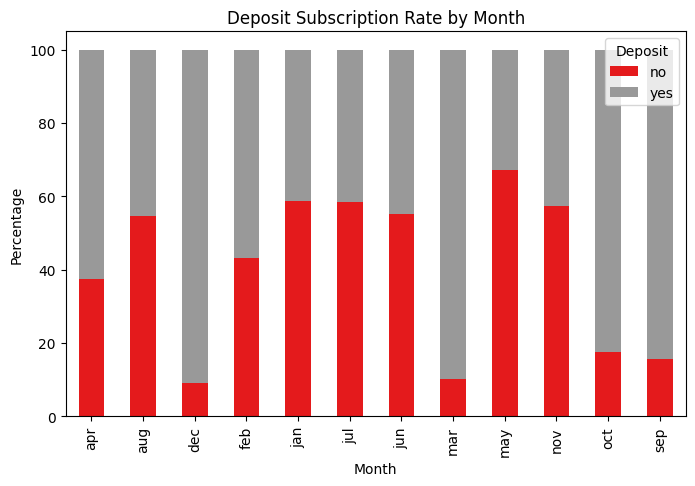

In [9]:
# Month vs Deposit (Seasonality)
month_deposit = pd.crosstab(df['month'], df['deposit'], normalize='index') * 100
month_deposit.plot(kind='bar', stacked=True, colormap='Set1', figsize=(8,5))
plt.title("Deposit Subscription Rate by Month")
plt.ylabel("Percentage")
plt.xlabel("Month")
plt.legend(title="Deposit")
plt.show()

**Strongest Months for Subscriptions**

- March, September, October, and December show higher success rates in bank marketing campaigns.

- These could align with seasonal factors such as bonuses, school fee payments, or end-of-year savings culture.


**Weakest Months**

- May usually stands out as a month with very high campaign volume but low success rate.

**Moderate Performance Months**

- June, July, August may show middle-ground success.

- Suggests clients are somewhat receptive but not as engaged as in peak months.

**What to do**

Seasonal Targeting

- Focus campaigns in months with historically high success (e.g., September–December).

- These periods might align with times when clients have more disposable income.

Reduce Inefficient Months

- If May continues to show high effort but low results, the bank should scale back campaigns in May or change the approach.

- Instead of quantity, improve message quality or test new channels.

Resource Optimization

- Allocate more agents and resources during high-performing months.

- This will maximize returns on marketing spend.

## **Overall Recommendations for the Campaign**

1. Focus on High-Potential Customer Segments

- Target students, retirees, and tertiary-educated professionals, especially those in stable job roles (management, admin, technicians).

- These groups consistently show higher subscription rates and are more responsive to marketing campaigns.

2. Prioritize Cellular Contact

- Campaigns conducted through cellular calls outperform telephone and unknown contacts by a wide margin.

- The bank should allocate most campaign resources to mobile-first outreach strategies.

3. Optimize Call Quality & Duration

- Call duration is the strongest predictor of deposit subscription.

- Short calls rarely convert; longer, engaging conversations significantly increase success rates.

**Recommendation:** Get people (agents) with scripts, objection-handling guides, and training to keep customers engaged.

4. Limit Excessive Contact Attempts

- Success rates drop sharply after 3–4 contacts per campaign.

- Additional attempts waste resources and may frustrate clients.

**Recommendation:** Cap follow-ups at 3–4 calls and redirect effort to new leads.

5. Leverage Past Campaign Outcomes

- Clients with a successful previous outcome (poutcome = success) or recent contact (low pdays) are much more likely to subscribe again.

**Recommendation:** Build a priority list of warm leads from past campaigns for early targeting.

# **Insight Outlook**

By shifting focus from demographics alone to behavioral and campaign-related factors (call quality, contact method, timing, and past engagement), the bank can:

1. Improve efficiency of campaigns.

2. Reduce wasted resources.

3. Increase overall subscription rates for term deposits.